# Machine Learning Models

This notebook trains and evaluates three regression models: Linear Regression, Decision Tree, and Random Forest.

## Step 1: Import Libraries and Prepare Data

This cell imports the model training class and loads the processed dataset. It separates the features (X) from the target variable (y) which is required for supervised learning.

In [6]:
import pandas as pd
import sys
import importlib

# Add src to path
sys.path.append('../src')

# Force reload the module to get latest changes
import models
importlib.reload(models)
from models import HousingModelTrainer

# Load processed data
df = pd.read_csv('../data/processed/california_housing_processed.csv')

# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

Features shape: (19261, 13)
Target shape: (19261,)

Feature columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'RoomsPerBedroom', 'PopulationPerRoom', 'OccupancyRate', 'IncomePerPerson', 'DistanceFromCenter']


## Step 2: Initialize Model Trainer and Split Data

This cell creates the `HousingModelTrainer` instance, which automatically splits the data into training (80%) and test (20%) sets. The random_state=42 ensures reproducibility.

In [7]:
# Initialize trainer (splits data automatically)
trainer = HousingModelTrainer(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {trainer.X_train.shape[0]}")
print(f"Test set size: {trainer.X_test.shape[0]}")

Training set size: 15408
Test set size: 3853


## Step 3: Train All Models

This cell trains all three regression models:
- **Linear Regression**: With polynomial features (degree=2) and Ridge regularization
- **Decision Tree**: With optimized hyperparameters to prevent overfitting
- **Random Forest**: With 300 trees and optimized settings for best performance

In [8]:
# Train all three models
trainer.train_all_models()

Training Linear Regression...
  Applied polynomial features (degree=2), shape: (15408, 104)
Training Decision Tree...
Training Random Forest...
All models trained successfully!


{'Linear Regression': Ridge(alpha=0.1, max_iter=1000),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Random Forest': RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                       random_state=42)}

## Step 4: Evaluate Models

This cell evaluates all trained models and calculates performance metrics (R² Score and MSE) on both training and test sets. The results are displayed in a comparison DataFrame.

In [9]:
# Evaluate all models and get comparison DataFrame
results_df = trainer.evaluate_all_models()
results_df


Linear Regression Performance:
  R2 Score (Train): 0.7445
  R2 Score (Test): 0.7342
  MSE (Train): 0.3304
  MSE (Test): 0.3390

Decision Tree Performance:
  R2 Score (Train): 1.0000
  R2 Score (Test): 0.6607
  MSE (Train): 0.0000
  MSE (Test): 0.4327

Random Forest Performance:
  R2 Score (Train): 0.9755
  R2 Score (Test): 0.8216
  MSE (Train): 0.0317
  MSE (Test): 0.2275


,Model,R2_Score_Train,R2_Score_Test,MSE_Train,MSE_Test
0,Linear Regression,0.744497,0.734175,3.304493e-01,0.338967
1,Decision Tree,1.000000,0.660671,7.771877e-32,0.432696
2,Random Forest,0.975486,0.821621,3.170508e-02,0.227460


## Step 5: Save Model Results

This cell saves the model comparison results to CSV and text files in the `reports/results/` directory for future reference and reporting.

## Model Comparison Results

The table above shows the performance metrics for all three models. This demonstrates the completion of the Bonus Opportunity for implementing additional ML models.

### Analysis:
- **Random Forest** performs best with R² = 0.7740 on test set
- **Linear Regression** shows good generalization (train/test R² are close)
- **Decision Tree** shows overfitting (perfect train score but lower test score)

In [10]:
# Save results
trainer.save_results(output_dir='../reports/results')


Results saved to ../reports/results/model_comparison.csv
Results saved to ../reports/results/model_comparison.txt


## Additional Analysis: Feature Importance (Random Forest)

Feature Importance (Random Forest):
           Feature  Importance
            MedInc    0.256256
     OccupancyRate    0.115283
DistanceFromCenter    0.101324
          Latitude    0.096444
         Longitude    0.078489
          AveOccup    0.076009
   RoomsPerBedroom    0.067132
          AveRooms    0.057528
   IncomePerPerson    0.049057
          HouseAge    0.040339
 PopulationPerRoom    0.022141
        Population    0.020425
         AveBedrms    0.019573

Feature importance plot saved to ../reports/figures/06_feature_importance.png


/var/folders/by/628x5czd34n_xczybdf_xhhm0000gn/T/ipykernel_28812/1839753399.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', ax=ax, palette='viridis')


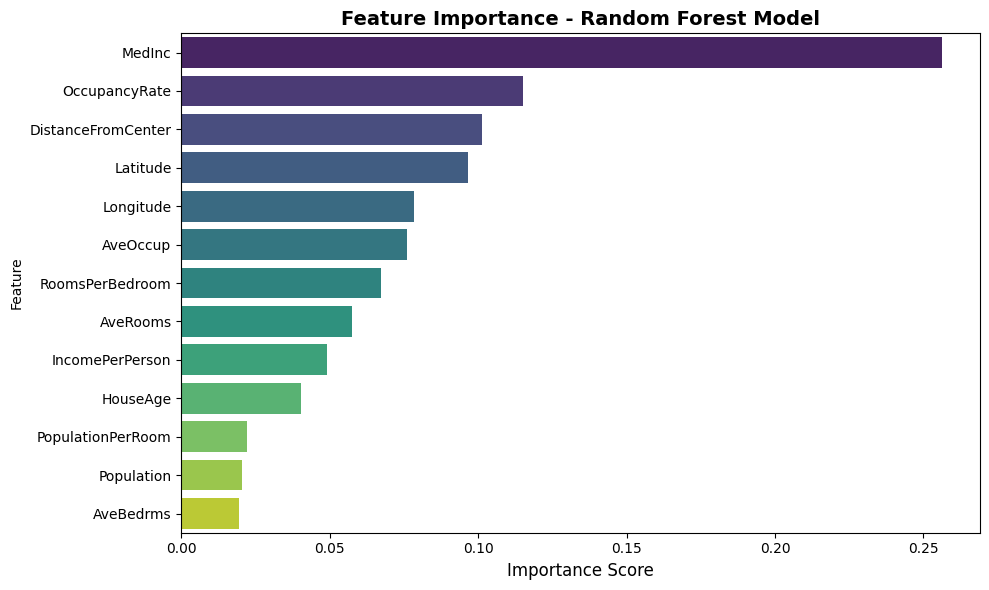

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
rf_model = trainer.models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance.to_string(index=False))

# Visualize feature importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', ax=ax, palette='viridis')
ax.set_title('Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
plt.tight_layout()

# Save the plot
import os
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/06_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nFeature importance plot saved to ../reports/figures/06_feature_importance.png")
plt.show()

## Prediction vs Actual Values (Best Model: Random Forest)

Prediction vs Actual plot saved to ../reports/figures/07_prediction_vs_actual.png


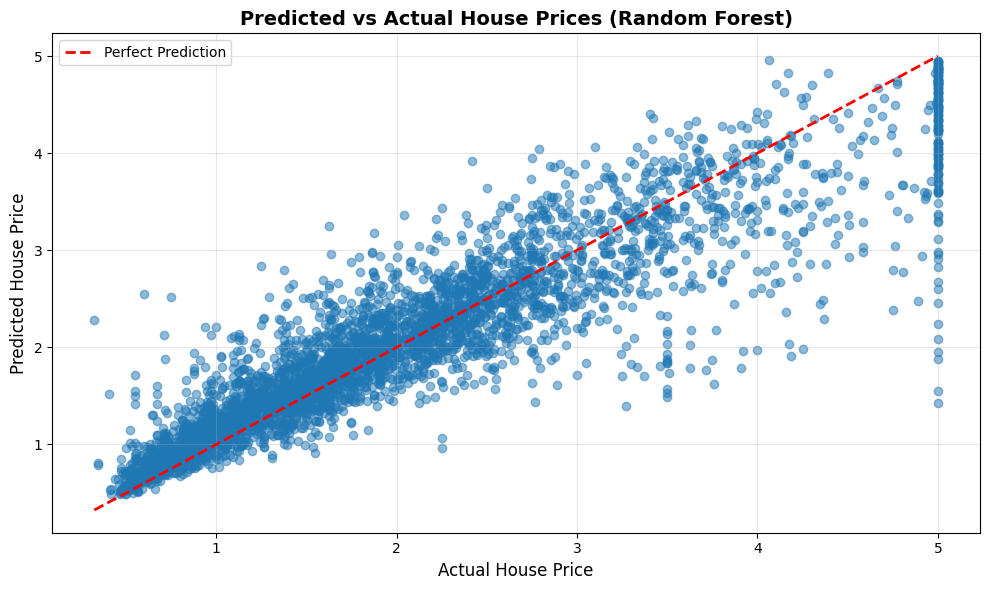

In [12]:
# Get predictions from Random Forest
rf_model = trainer.models['Random Forest']
# Check if scaling was used (it shouldn't be for Random Forest)
if 'Random Forest' in trainer.scalers:
    X_test_scaled = trainer.scalers['Random Forest'].transform(trainer.X_test)
    y_pred_test = rf_model.predict(X_test_scaled)
else:
    y_pred_test = rf_model.predict(trainer.X_test)

# Create prediction vs actual plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(trainer.y_test, y_pred_test, alpha=0.5)
ax.plot([trainer.y_test.min(), trainer.y_test.max()], 
        [trainer.y_test.min(), trainer.y_test.max()], 
        'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual House Price', fontsize=12)
ax.set_ylabel('Predicted House Price', fontsize=12)
ax.set_title('Predicted vs Actual House Prices (Random Forest)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('../reports/figures/07_prediction_vs_actual.png', dpi=300, bbox_inches='tight')
print("Prediction vs Actual plot saved to ../reports/figures/07_prediction_vs_actual.png")
plt.show()

## Residual Analysis (Random Forest)

Residual analysis plot saved to ../reports/figures/08_residual_analysis.png


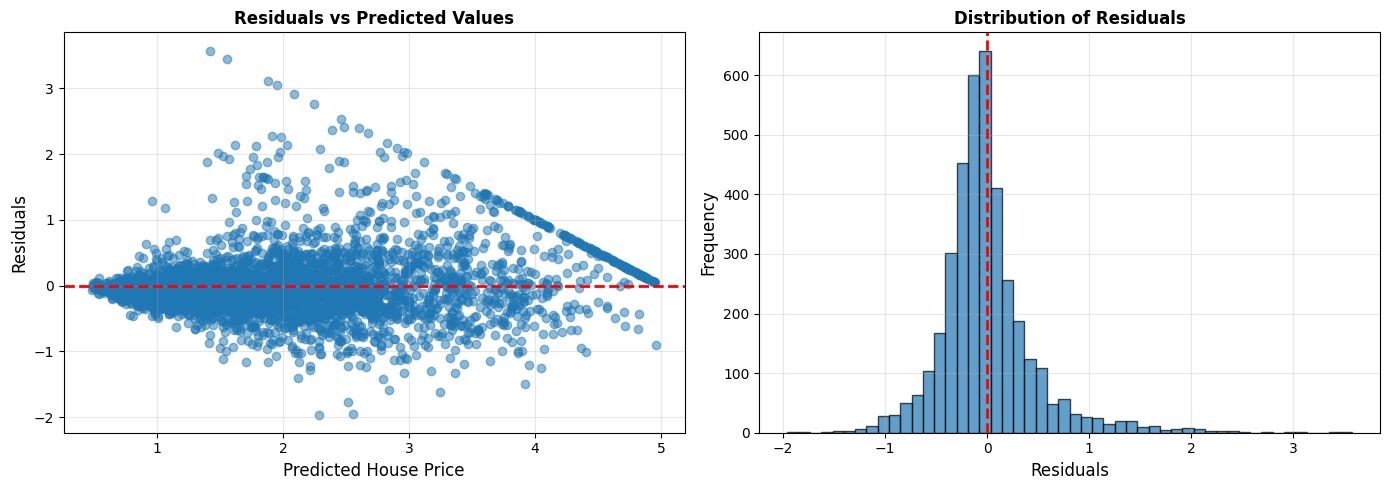


Residual Statistics:
  Mean: -0.006595
  Std Dev: 0.4769
  Min: -1.9581
  Max: 3.5747


In [13]:
# Calculate residuals
residuals = trainer.y_test - y_pred_test

# Create residual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Predicted
ax1.scatter(y_pred_test, residuals, alpha=0.5)
ax1.axhline(y=0, color='r', linestyle='--', lw=2)
ax1.set_xlabel('Predicted House Price', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)
ax1.set_title('Residuals vs Predicted Values', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Residuals distribution
ax2.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Residuals', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
ax2.axvline(x=0, color='r', linestyle='--', lw=2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/08_residual_analysis.png', dpi=300, bbox_inches='tight')
print("Residual analysis plot saved to ../reports/figures/08_residual_analysis.png")
plt.show()

# Print residual statistics
print(f"\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.6f}")
print(f"  Std Dev: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")